Maslennikov Nikita, MIPT student [github](https://github.com/masl3noki)

# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [55]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures # for LogReg enhancement
from sklearn.pipeline import Pipeline # for optimal hyperparameters search and more precise actions for ML automization
from sklearn.base import clone # for model cloning

# key models:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import mlxtend
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

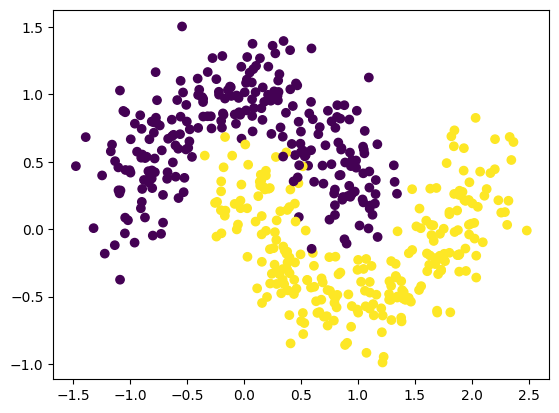

In [22]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [37]:
def plot_decisions(data, target, estimator):
  """Plot results of model predictions

  Arguments:
    data: 'features' part of dataset;
    target: 'target' part of dataset;
    estimator: model for analysis.
  """

  #func dlya obychenia i vyvoda metric i oblastei classov
  X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3,random_state=42)
  estimator.fit(X_train,y_train)

  if (estimator.__class__.__name__) == "SVC":
    kernel_param = estimator.get_params()['kernel']
    print(f"Scores and 'Decision boundary' plot for {estimator.__class__.__name__} with {kernel_param} kernel:")
  else:
    print(f"Scores and 'Decision boundary' plot for {estimator.__class__.__name__}:")

  print(sklearn.metrics.classification_report(y_test, estimator.predict(X_test)))

  fig = plot_decision_regions(X=X_test, y=y_test,clf=estimator)
  plt.title(estimator)
  plt.show()

Scores and 'Decision boundary' plot for LogisticRegression:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        75
           1       0.89      0.84      0.86        75

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



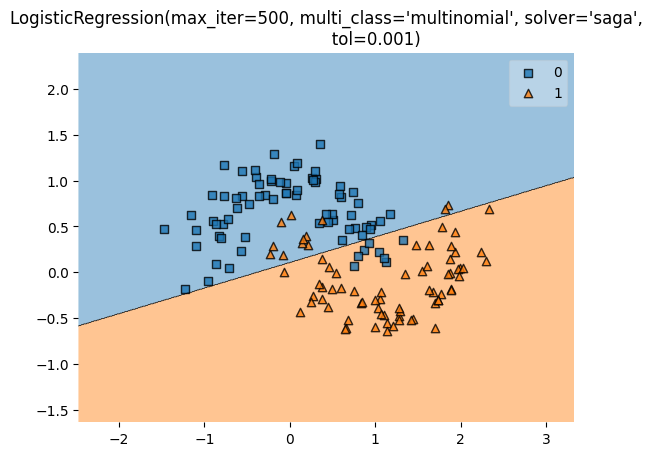

Scores and 'Decision boundary' plot for SVC with linear kernel:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        75
           1       0.89      0.84      0.86        75

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



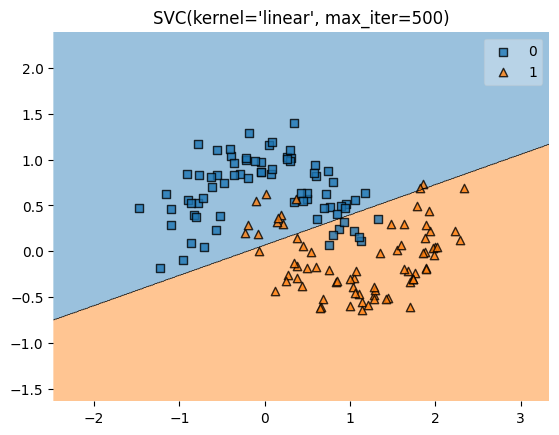

In [38]:
lr = LogisticRegression(penalty='l2', multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
plot_decisions(moons_points, moons_labels,lr)

svm = SVC(kernel='linear',tol=1e-3,max_iter=500)
plot_decisions(moons_points, moons_labels,svm)

Data is structured in a way where linear models fail to make good predictions. Although, score of 0.87 is pretty good.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Scores and 'Decision boundary' plot for SVC with sigmoid kernel:
              precision    recall  f1-score   support

           0       0.62      0.61      0.62        75
           1       0.62      0.63      0.62        75

    accuracy                           0.62       150
   macro avg       0.62      0.62      0.62       150
weighted avg       0.62      0.62      0.62       150



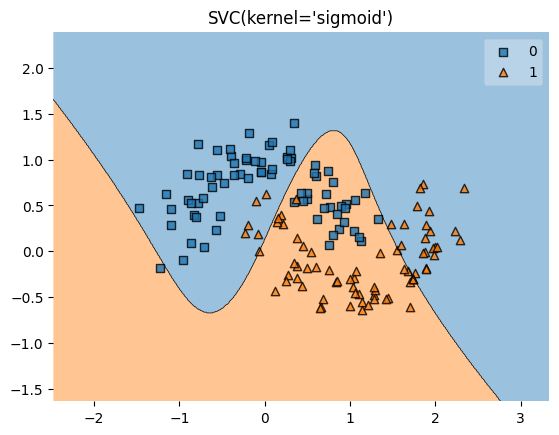

In [60]:
svm_sigmoid = SVC(kernel='sigmoid')
plot_decisions(moons_points, moons_labels,svm_sigmoid)

The thing about SVC kernels is that how well they perform is totally dependent on the data structure. Remember that kernel function is:

$$ K(\mathbf{x_1}, \mathbf{x_2}) = tanh(\gamma\ \mathbf{x_1}^T\mathbf{x_2} + \text{bias}) $$

Therefore for better performance data should be shaped like hyperbolic tangent function.

Scores and 'Decision boundary' plot for SVC with poly kernel:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        75
           1       0.89      0.93      0.91        75

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



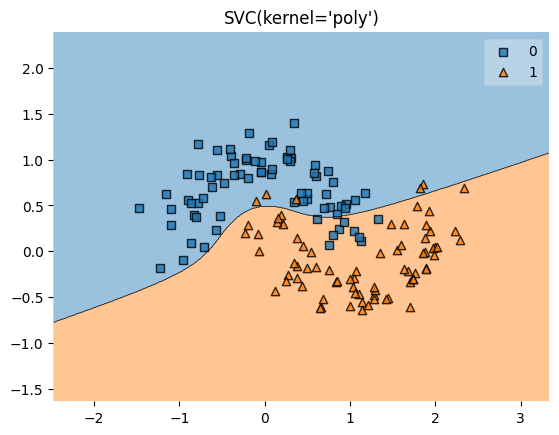

In [62]:
svm_poly = SVC(kernel='poly', degree=3)
plot_decisions(moons_points, moons_labels,svm_poly)

`poly` kernel is defined as:

$$ K(\mathbf{x_1}, \mathbf{x_2}) = (\gamma\ \mathbf{x_1}^T\mathbf{x_2} + \text{bias})^{\text{degree}} $$

It is far better than previous one, but `radial basis function` kernel will perform much better. Still, `poly` kernel has its uses when data is structured in independent clusters.

Scores and 'Decision boundary' plot for SVC with rbf kernel:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.96      0.98        75

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



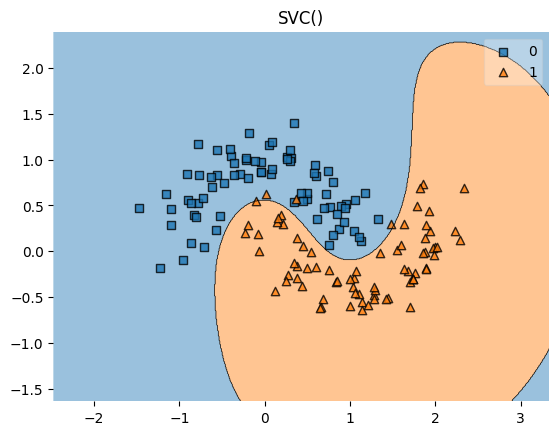

In [63]:
svm_rbf = SVC(kernel='rbf')
plot_decisions(moons_points, moons_labels,svm_rbf)

The Gaussian kernel a.k.a. `rbf` kernel measures similarity between two data points in infinite dimensions and then approaches classification by majority vote. The kernel function is defined as:

$$ K(\mathbf{x_1}, \mathbf{x_2}) = exp(-\gamma\ ||\mathbf{x_1} - \mathbf{x_2}||^2) $$

The larger `l2` distance between two points the closer $K(\mathbf{x_1}, \mathbf{x_2})$ is to zero, which means that two points far away are more likely to be labeled differently.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Scores and 'Decision boundary' plot for Pipeline:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        75
           1       1.00      0.92      0.96        75

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



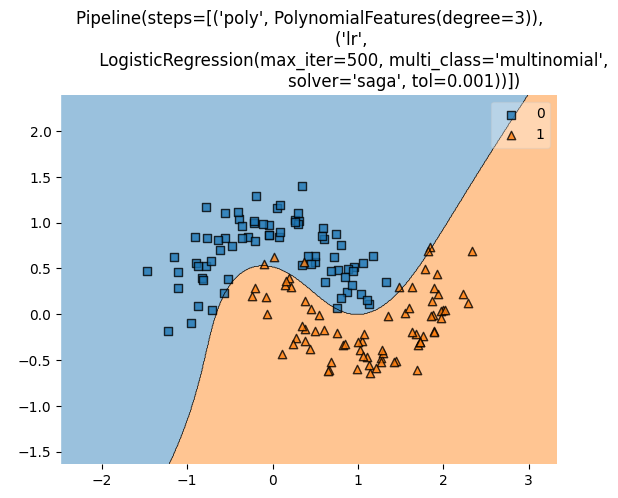

In [58]:
Simple_Pipeline = Pipeline([
                ('poly', PolynomialFeatures(degree = 3)),
                ('lr', clone(lr))
                ])

plot_decisions(moons_points, moons_labels, Simple_Pipeline)

`LogisticRegression` with polynomial features perform better than `SVC: {kernel: 'poly'}`, but `SVC: {kernel: 'rbf'}` still is the best model we have right now. Also `degree` parameter is set to `3` because high values of this hyperparameter might lead to overfitting.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

Scores and 'Decision boundary' plot for SVC with rbf kernel:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        75
           1       0.97      0.92      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



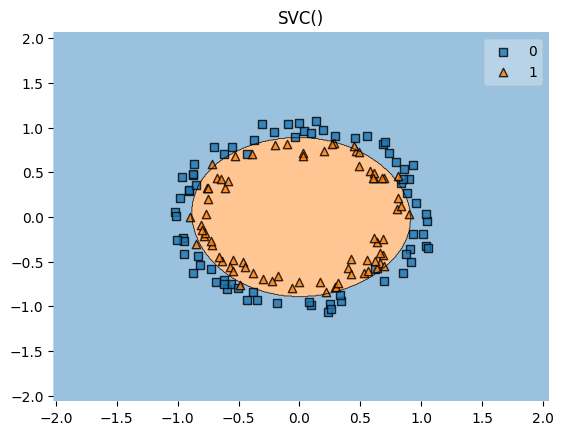

In [67]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

svm_circles = clone(svm_rbf)
plot_decisions(circles_points, circles_labels,svm_circles)

Scores and 'Decision boundary' plot for Pipeline:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        75
           1       0.96      0.92      0.94        75

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



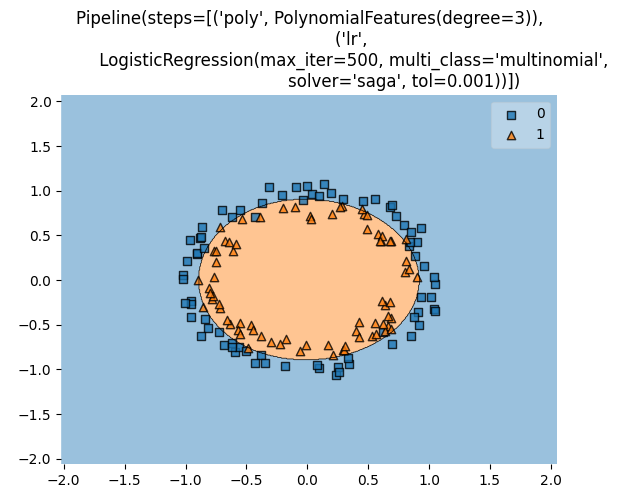

In [68]:
Second_Pipeline = Pipeline([
                ('poly', PolynomialFeatures(degree = 3)),
                ('lr', clone(lr))
                ])
plot_decisions(circles_points, circles_labels, Second_Pipeline)

Here we can see that `SVC: {kernel: 'poly'}` performs the same as `SVC: {kernel: 'rbf'}` because they are almost the same here.


---



Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Scores and 'Decision boundary' plot for SVC with rbf kernel:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        72
           1       0.89      0.92      0.91        78
           2       0.88      0.94      0.91        67
           3       0.95      0.87      0.91        83

    accuracy                           0.91       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.92      0.91      0.91       300



/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


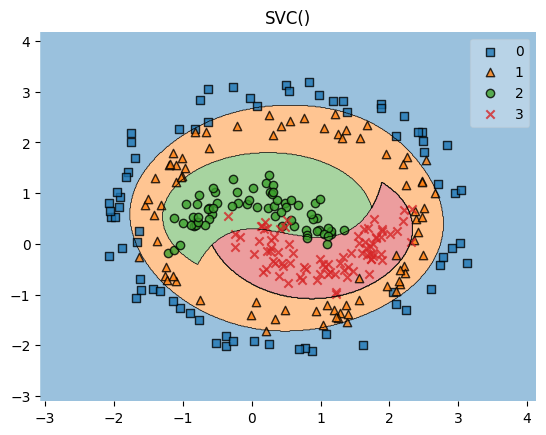

In [69]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))

svm_circles = clone(svm_rbf)
plot_decisions(points, labels, svm_circles)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scores and 'Decision boundary' plot for Pipeline:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        72
           1       0.92      0.86      0.89        78
           2       0.92      0.99      0.95        67
           3       0.94      0.96      0.95        83

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


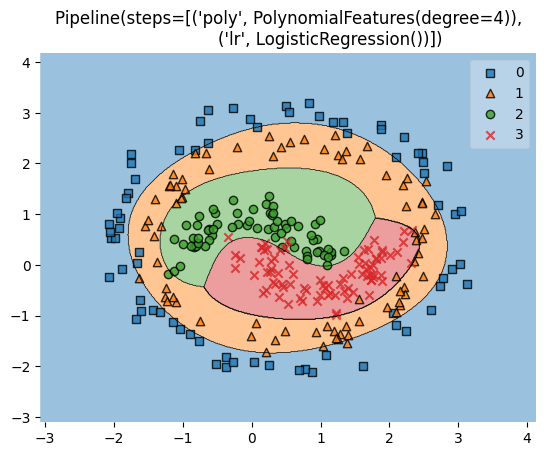

In [74]:
Third_Pipeline = Pipeline([
                          ('poly',PolynomialFeatures(degree = 3)),
                          ('lr', clone(lr))
                          ])
plot_decisions(points, labels,pipe)

# Overall conclusion: rbf rules

It is unsurprising that `rbf` considered as default kernel for SVM. It is really great at dealing with data with curtain shape. But we can see a tendency here: `rbf kernel` is a universal kernel, however if we can use highly specific methods such as `sigmoid kernel` or `poly kernel` - we definately should use them, they might outperform more universal methods.

One of the reasons that we dont see `SVM` that much is because it is computationally complex, i.e. than random forest.

But consider plot below: here, `RandomForestClassifier` performs worse than higly specific, appropriate `SMV: {kernel: 'poly'}`! This scores further prove my words.

See also:
*   https://arxiv.org/abs/1606.00930



Scores and 'Decision boundary' plot for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91        72
           1       0.87      0.78      0.82        78
           2       0.90      0.94      0.92        67
           3       0.93      0.94      0.93        83

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


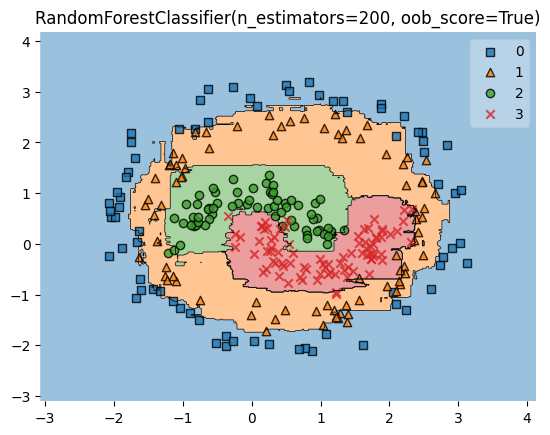

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, oob_score=True)
plot_decisions(points, labels, rf)